# HR Analytics Project- Understanding the Attrition in HR

In [32]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

Problem Statement

In this project, we have to predict the attrition status of an employee. Hence, this is a classification problem.

In [33]:
#Importing the dataset

df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Exploratory Data Analysis (EDA)

In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
df.shape

(1470, 35)

The dataset contains 1470 rows and 35 columns, out of which "Attrition" is the target variable.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [37]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in this dataset.

In [38]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Since the "EmployeeNumber" feature is unique for every employee, so we will remove this column later.

In [39]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [40]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Column 'EmployeeCount' is all 1s, which indicate every observation is unique, so we can drop this column.
Column 'StandardHours' is all 80s, which means everyone works as a full-time employee, and we can drop this column as well.
Column 'Over18' indicated that every employee is over the age of 18, so we can also drop this column.

In [41]:
df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Data Visualization

Univariate Analysis

In [42]:
sns.set()

No     1233
Yes     237
Name: Attrition, dtype: int64


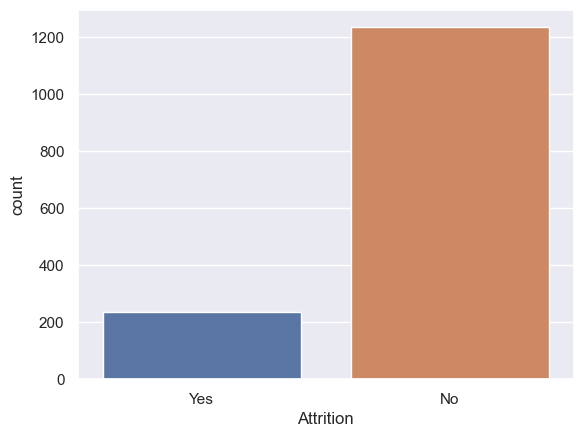

In [43]:
sns.countplot(x = 'Attrition', data = df)
print(df['Attrition'].value_counts())

The distribution of column 'Attrition' is not evenly balanced.

In [44]:
categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i] == object:
        categorical_col.append(i)
        
print('Categorical Coulmns:', categorical_col)
print("\n")

numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i] != object:
        numerical_col.append(i)
        
print('Numerical Columns:', numerical_col)

Categorical Coulmns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


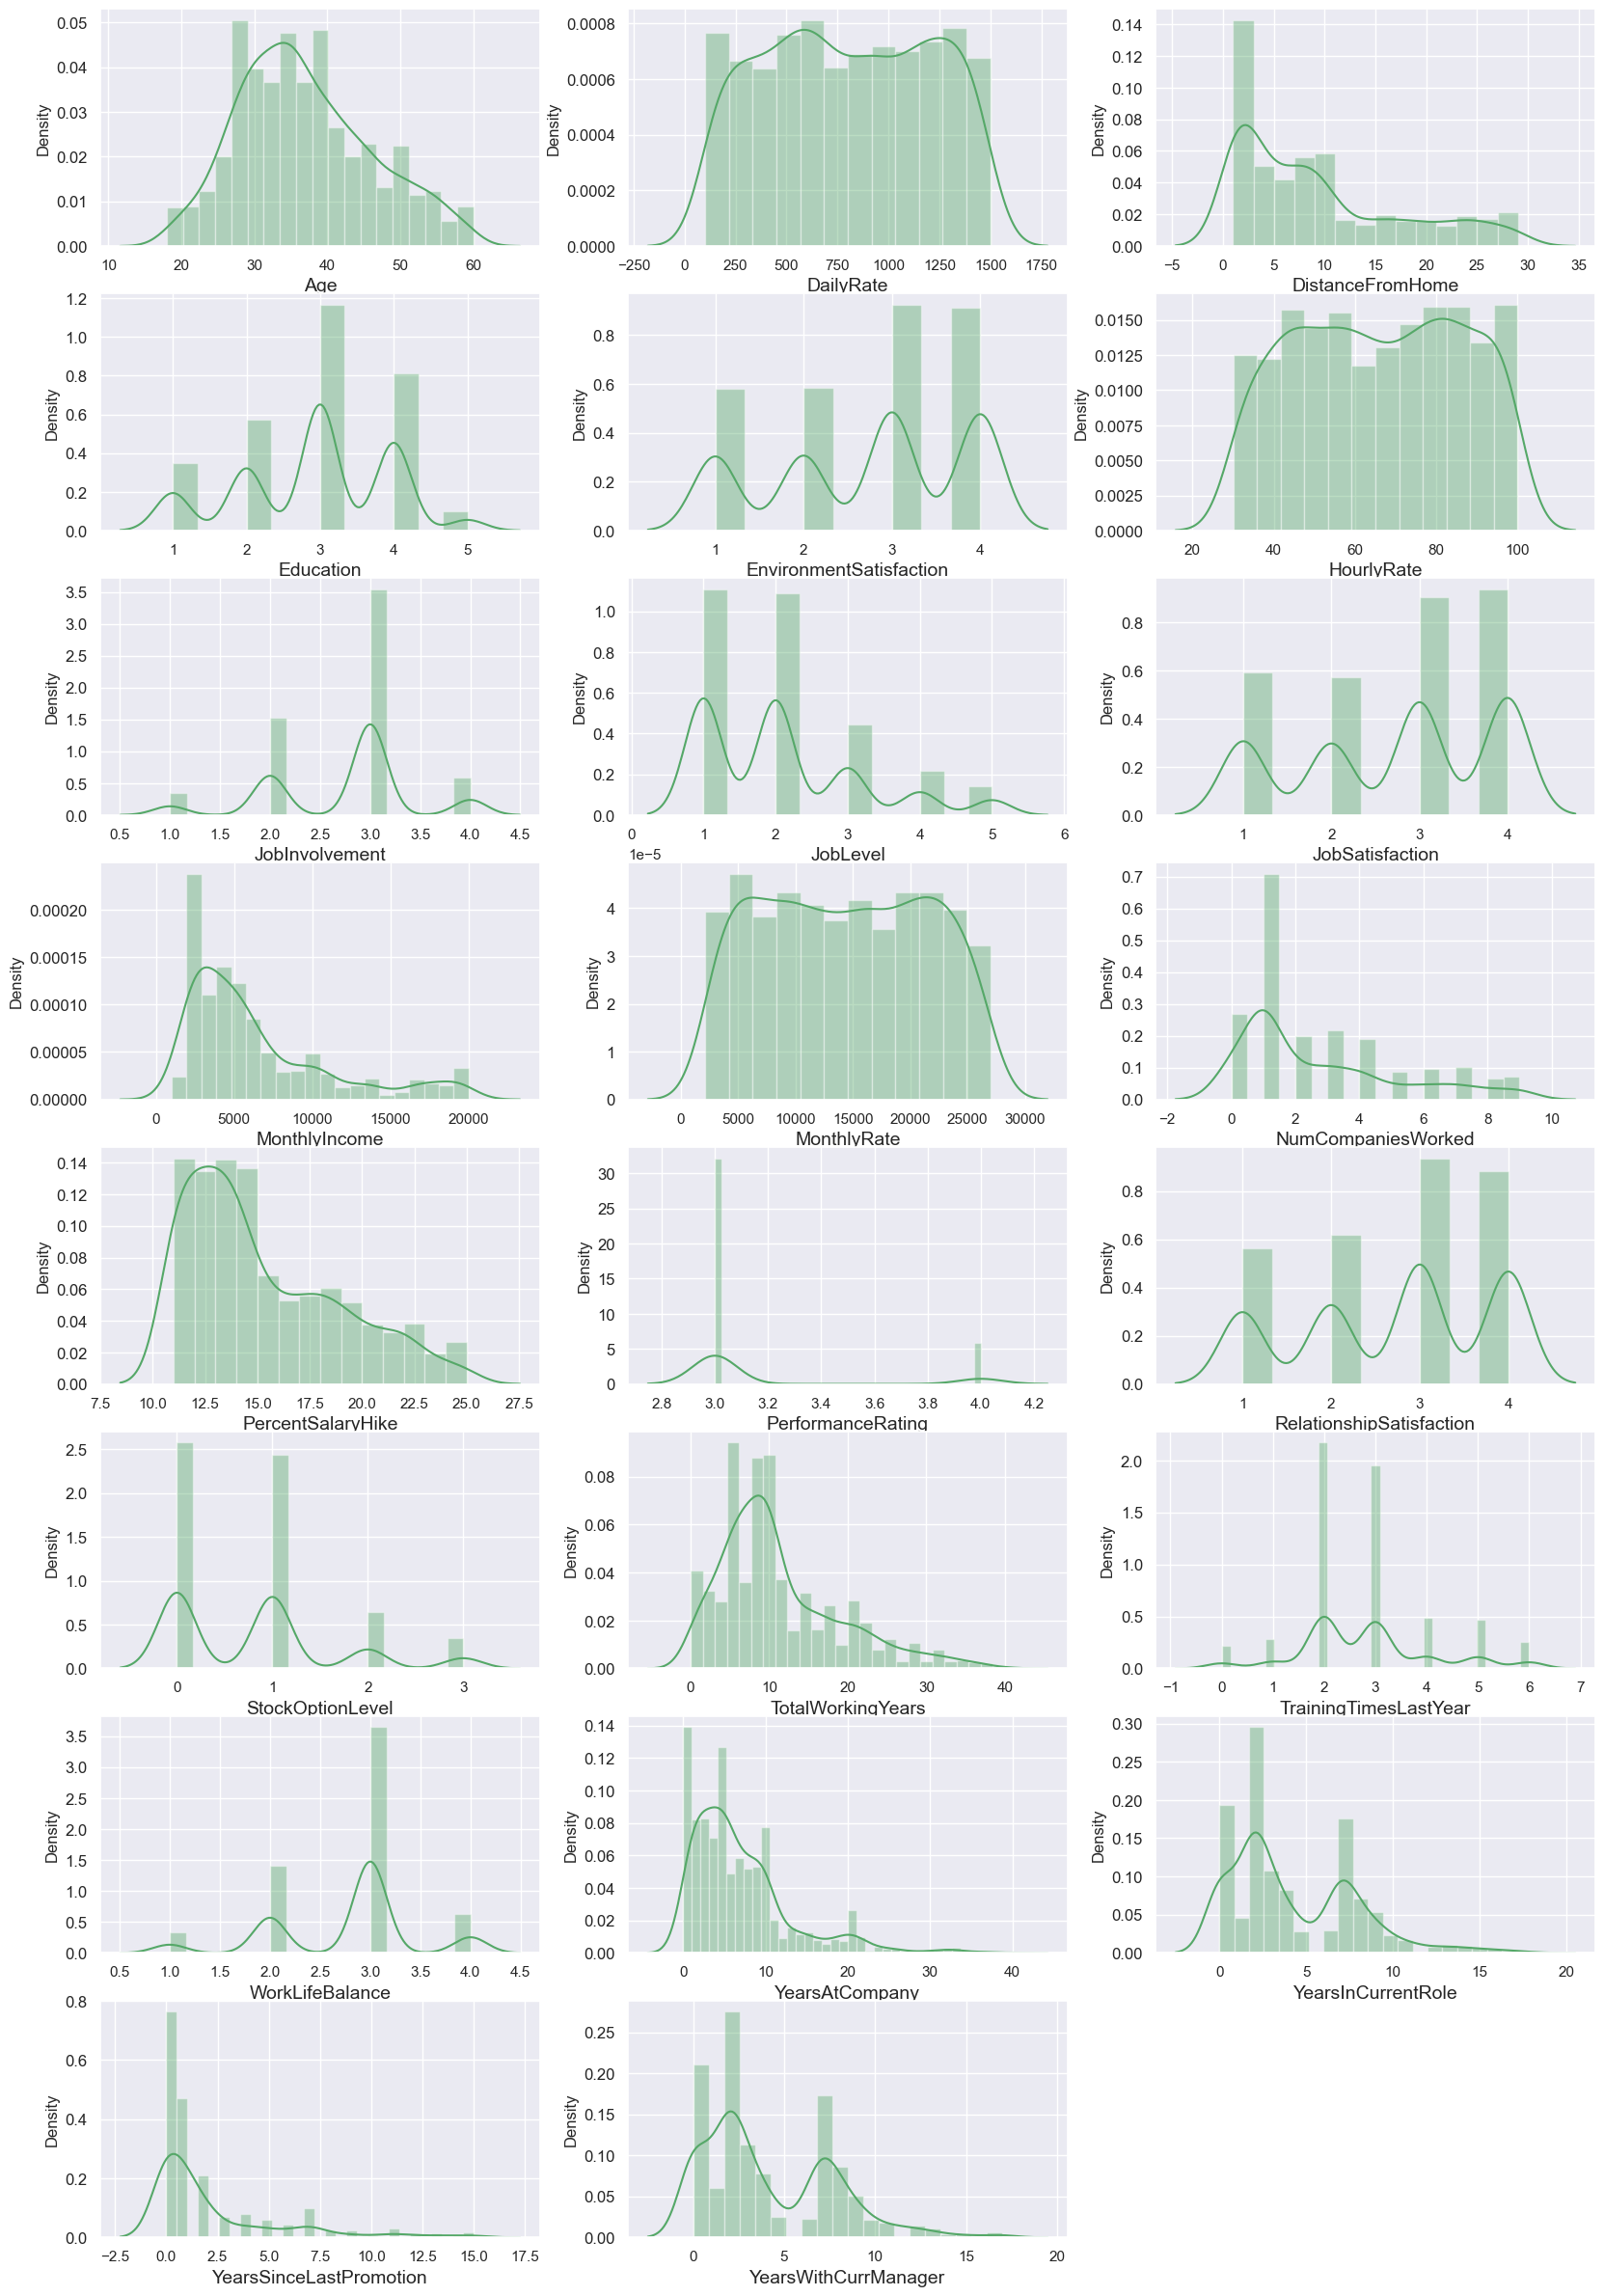

In [45]:
plt.figure(figsize = (20,30), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=24:
        plt.subplot(8,3,plotnumber)
        sns.distplot(df[col], color='g')
        plt.xlabel(col, fontsize=14)
        plt.yticks(rotation=0, fontsize=12)
    plotnumber+=1
plt.show()

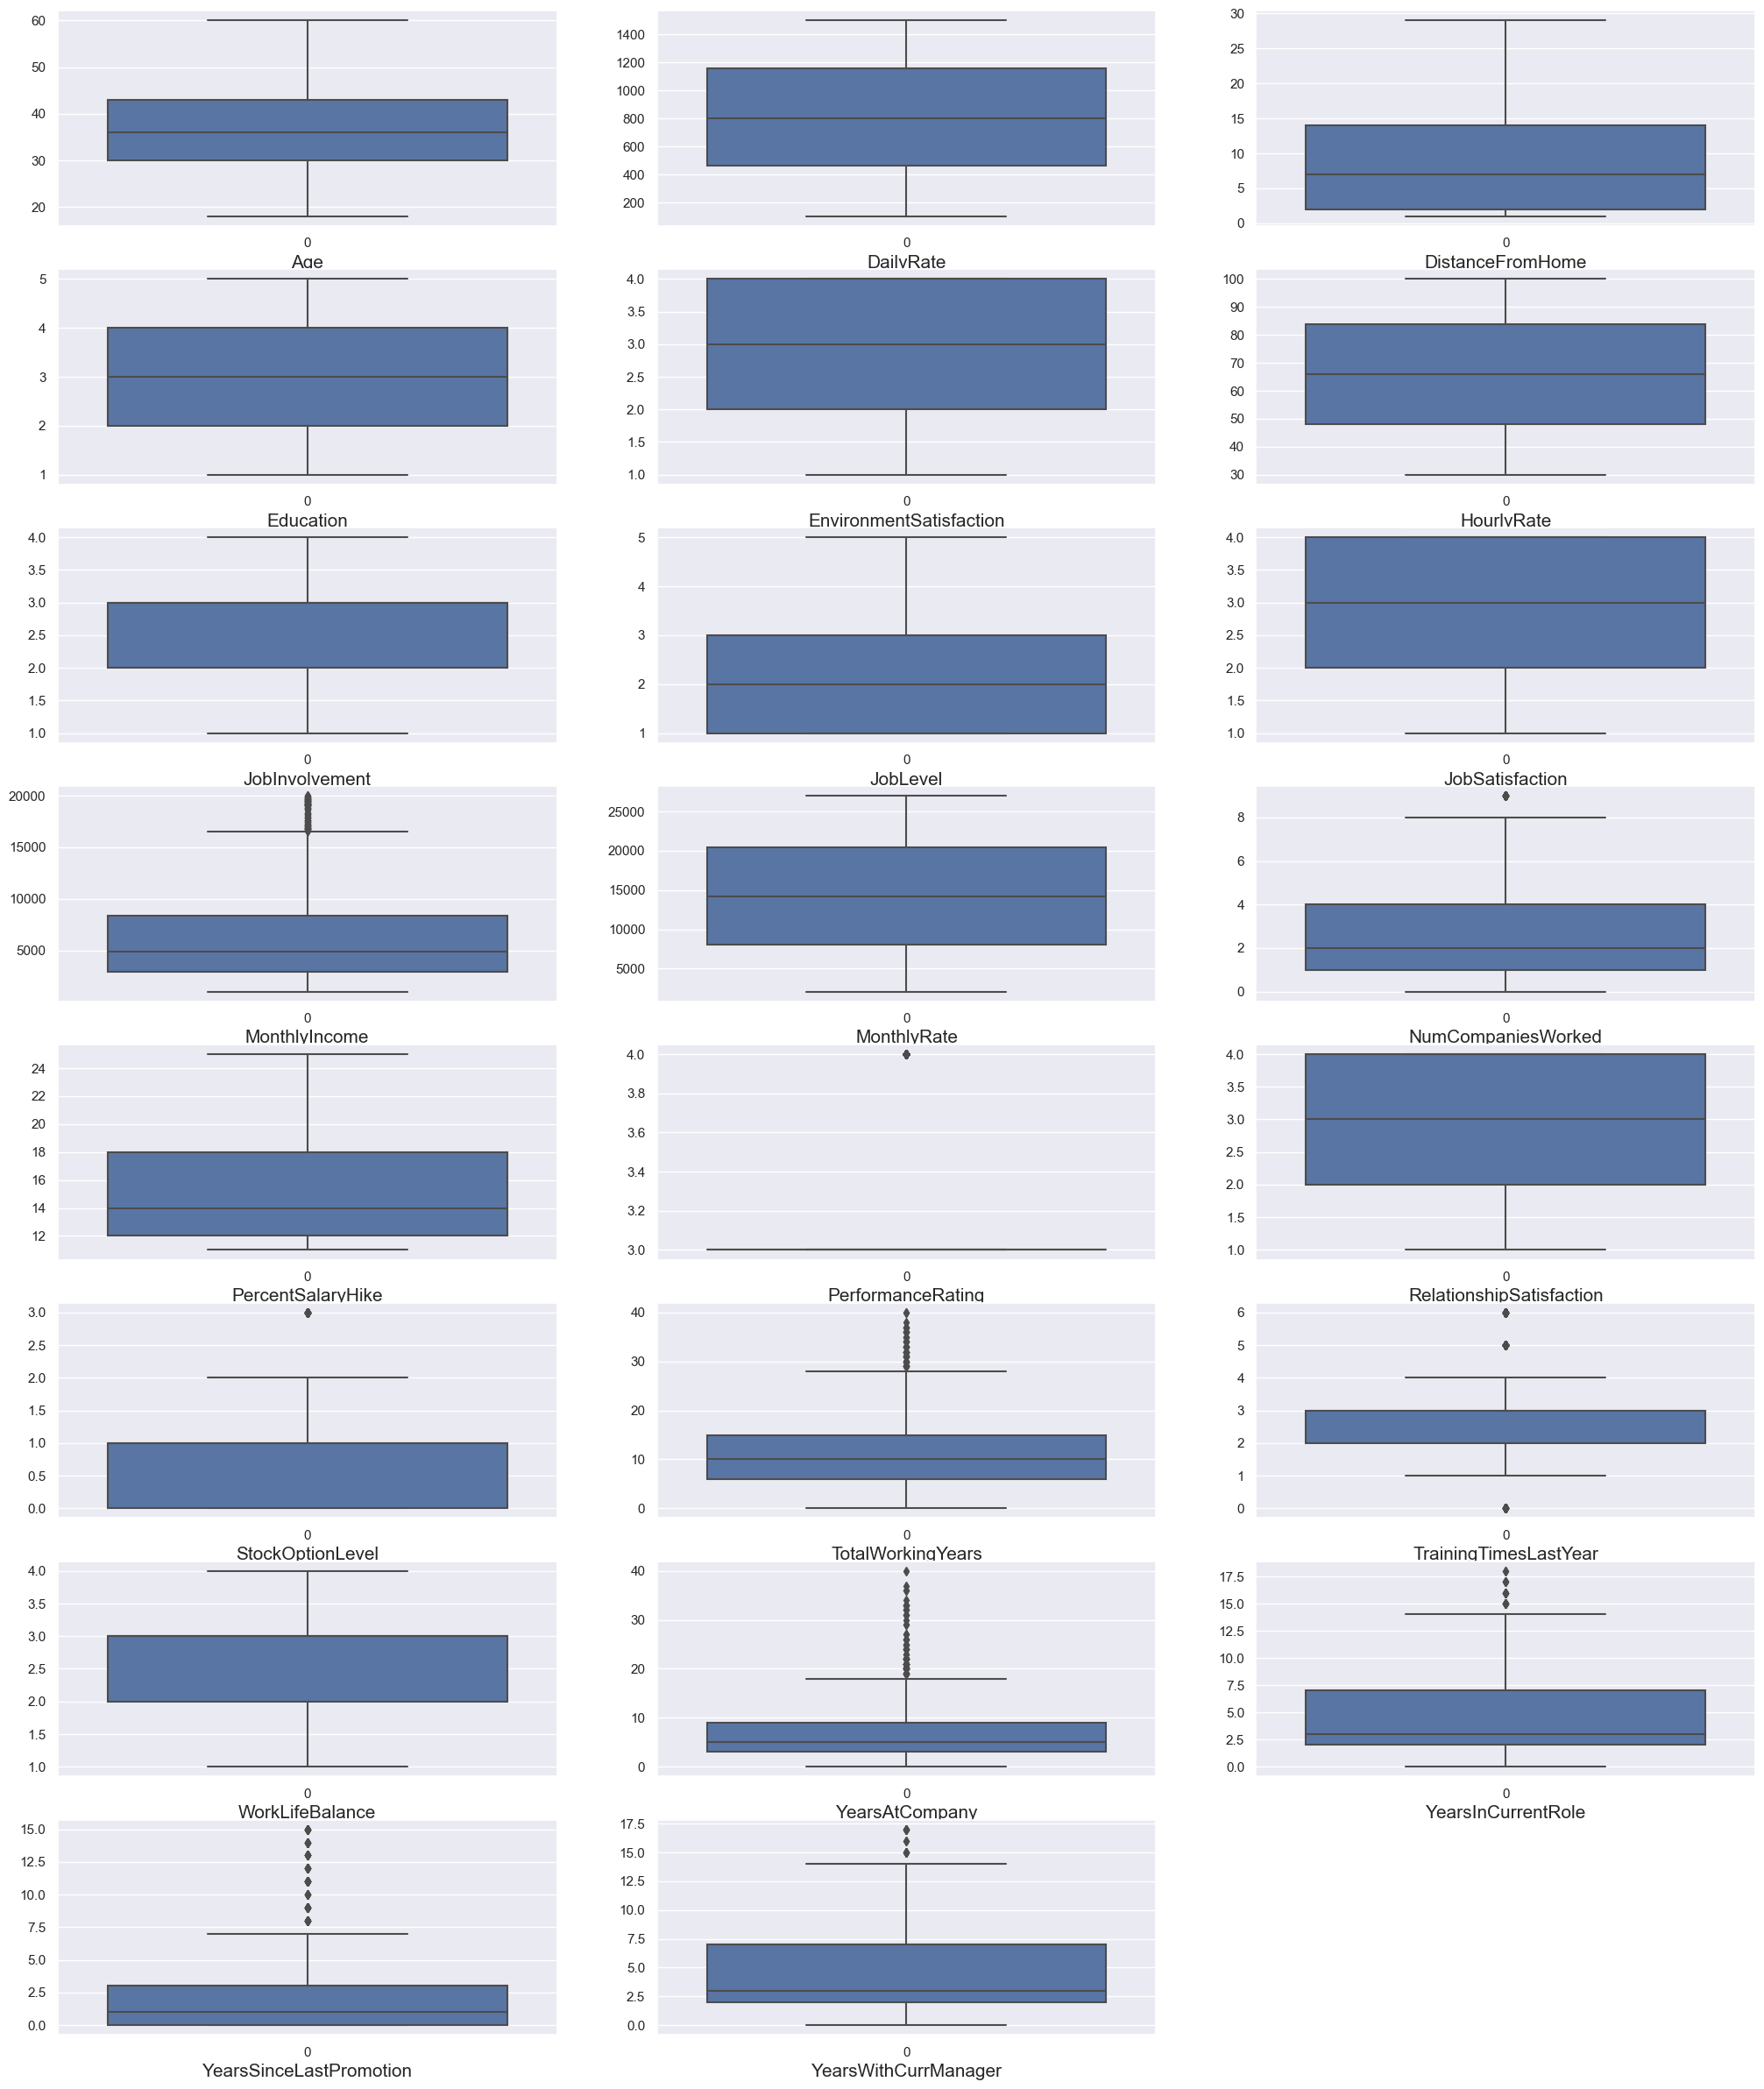

In [46]:
plt.figure(figsize=(25,30))
p=1
for i in numerical_col:
    if p<=24:
        plt.subplot(8,3,p)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=15)
    p+=1
plt.show()

Some of the features have no outliers, some have moderate outliers, and some have very high outliers in the dataset.

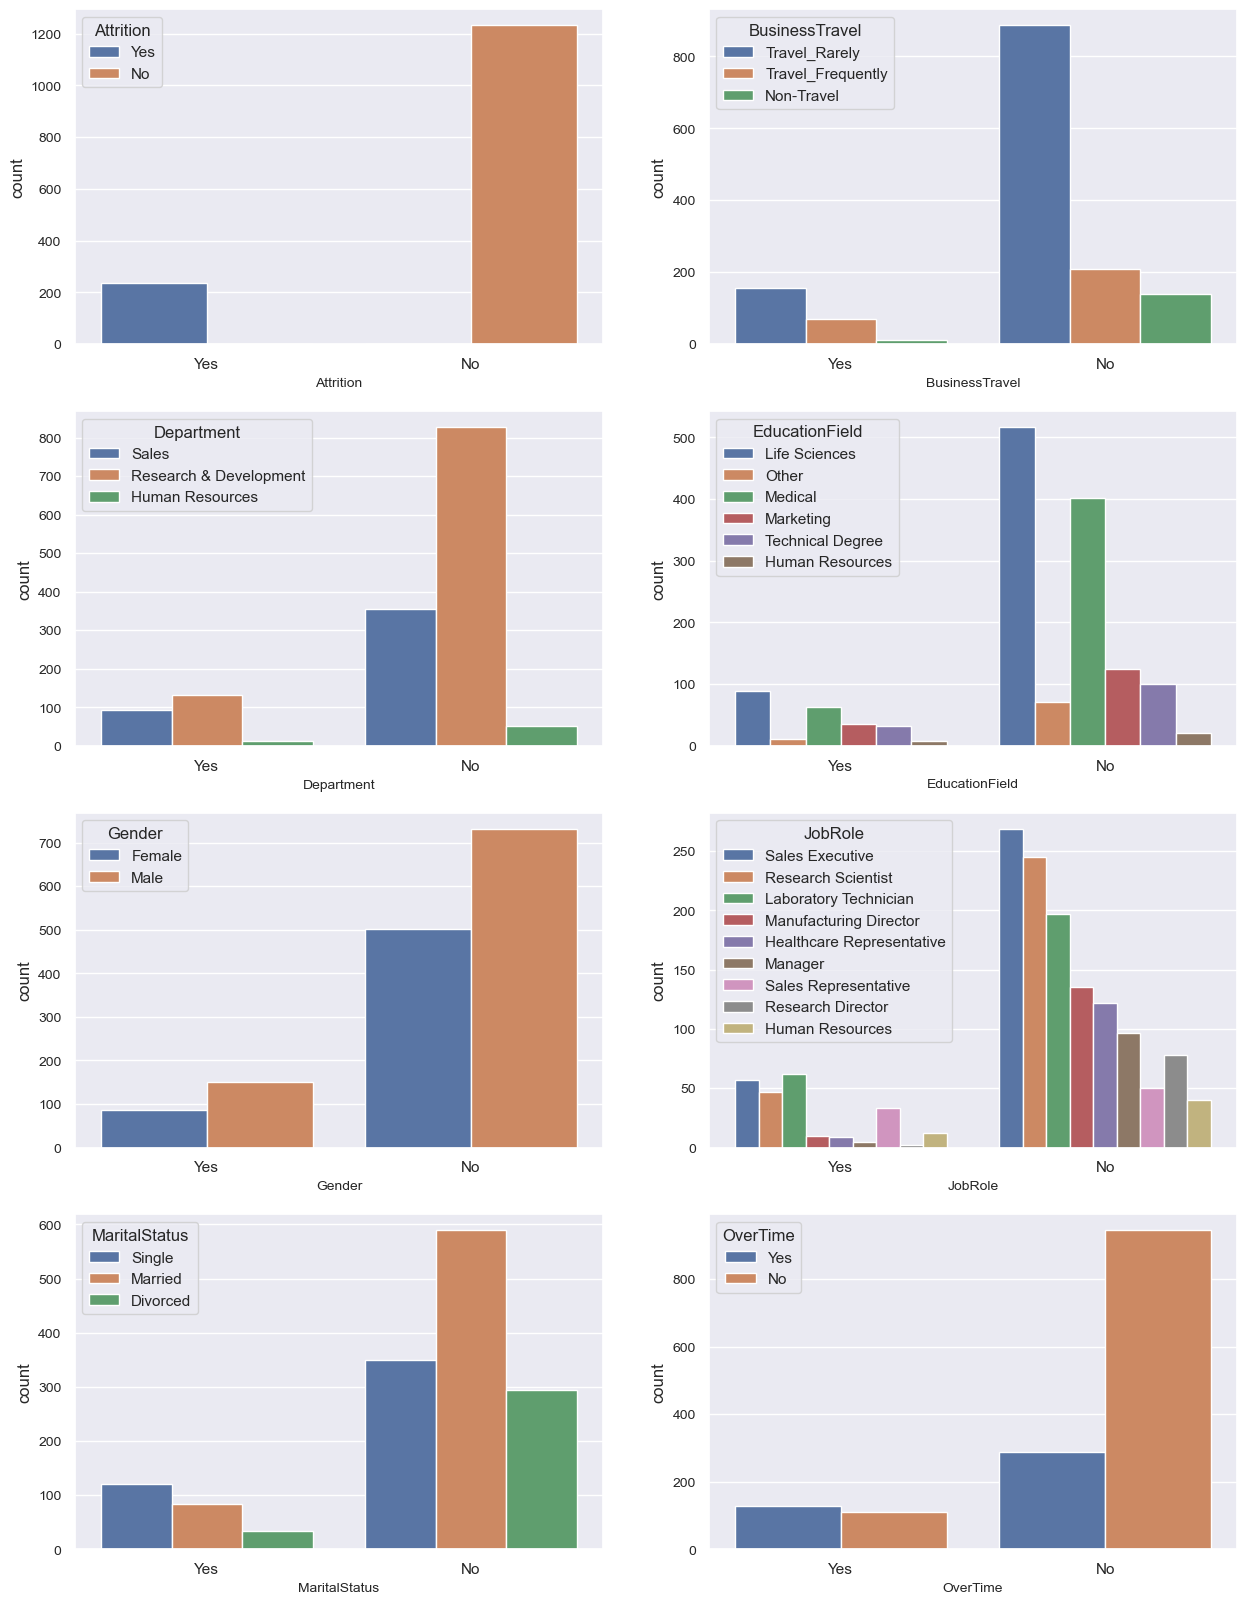

In [47]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for i in categorical_col:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.countplot(x='Attrition', hue=i, data=df)
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

# Feature Engineering

In [48]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Axes: >

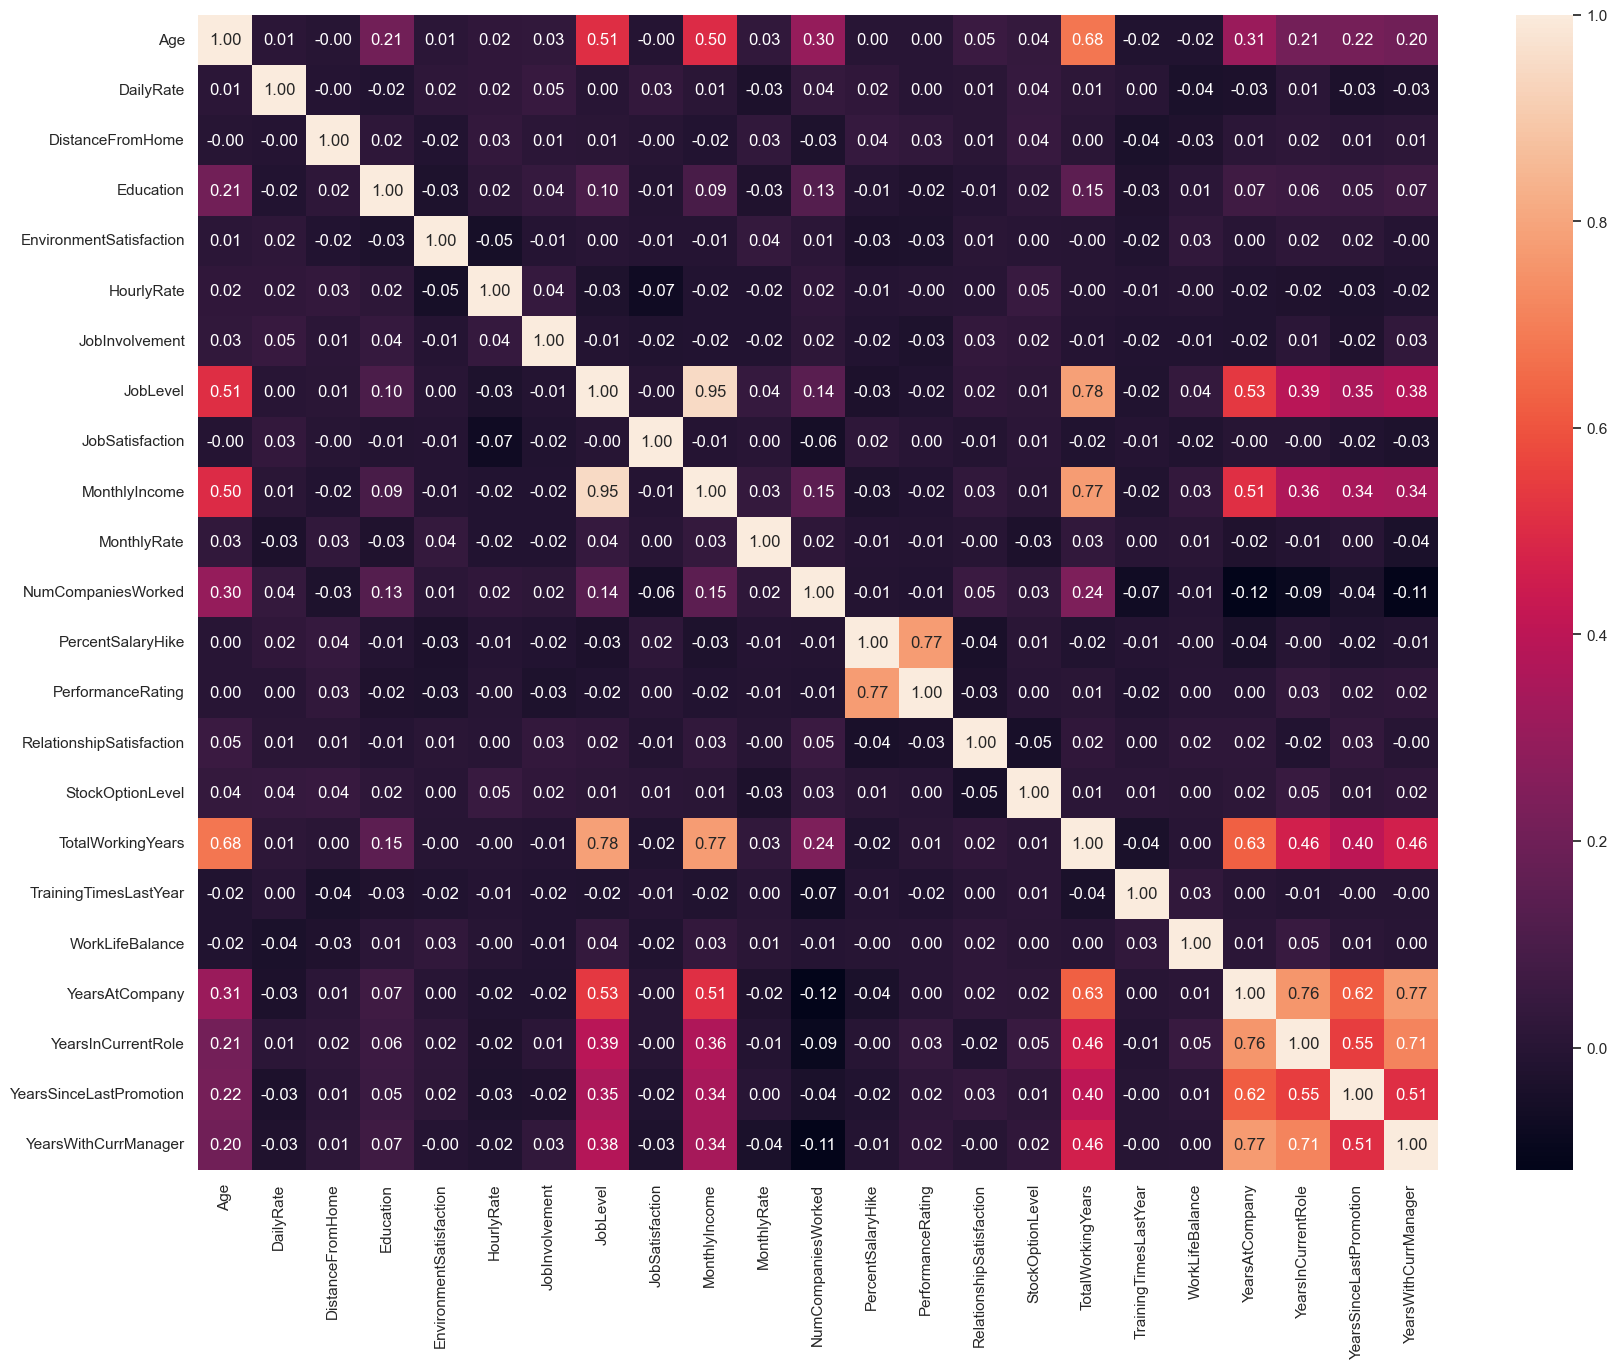

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

In [50]:
X = df
y = df.iloc[:, 1] 

In [51]:
X.drop('Attrition', axis = 1,  inplace = True)

In [52]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y)

In [53]:
#Changing the datatype to int

dum_BusinessTravel = pd.get_dummies(df['BusinessTravel'],prefix ='BusinessTravel') 
  
dum_Department = pd.get_dummies(df['Department'], prefix ='Department') 
  
dum_EducationField = pd.get_dummies(df['EducationField'], prefix ='EducationField') 
  
dum_Gender = pd.get_dummies(df['Gender'], prefix ='Gender', drop_first = True) 
  
dum_JobRole = pd.get_dummies(df['JobRole'], prefix ='JobRole') 
  
dum_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix ='MaritalStatus') 
  
dum_OverTime = pd.get_dummies(df['OverTime'], prefix ='OverTime', drop_first = True) 

In [55]:
# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department, 
              dum_EducationField, dum_Gender, dum_JobRole, 
              dum_MaritalStatus, dum_OverTime], axis = 1) 
  
# Removing the categorical data 
X.drop(['BusinessTravel', 'Department', 'EducationField', 
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
       axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape)

(1470, 49)
(1470,)


# Modelling

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score

In [59]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train, y_train)
    pred = LR.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Best accuracy is: ",MaxAccu, "at random state", MaxRS)

Best accuracy is:  0.8775510204081632 at random state 110


Creating Train Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=MaxRS)

In [61]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [62]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC= RFC.predict(X_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8888888888888888
[[383   2]
 [ 47   9]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       385
           1       0.82      0.16      0.27        56

    accuracy                           0.89       441
   macro avg       0.85      0.58      0.60       441
weighted avg       0.88      0.89      0.85       441



In [63]:
SVC = SVC()
SVC.fit(X_train, y_train)
predSVC= SVC.predict(X_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.873015873015873
[[385   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       385
           1       0.00      0.00      0.00        56

    accuracy                           0.87       441
   macro avg       0.44      0.50      0.47       441
weighted avg       0.76      0.87      0.81       441



In [64]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
predGBC= GBC.predict(X_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.9024943310657596
[[378   7]
 [ 36  20]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       385
           1       0.74      0.36      0.48        56

    accuracy                           0.90       441
   macro avg       0.83      0.67      0.71       441
weighted avg       0.89      0.90      0.89       441



In [65]:
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predABC= ABC.predict(X_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9002267573696145
[[374  11]
 [ 33  23]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       385
           1       0.68      0.41      0.51        56

    accuracy                           0.90       441
   macro avg       0.80      0.69      0.73       441
weighted avg       0.89      0.90      0.89       441



In [66]:
BGC = BaggingClassifier()
BGC.fit(X_train, y_train)
predBGC= BGC.predict(X_test)
print(accuracy_score(y_test,predBGC))
print(confusion_matrix(y_test,predBGC))
print(classification_report(y_test,predBGC))

0.8775510204081632
[[370  15]
 [ 39  17]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       385
           1       0.53      0.30      0.39        56

    accuracy                           0.88       441
   macro avg       0.72      0.63      0.66       441
weighted avg       0.86      0.88      0.86       441



In [67]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)
predETC= ETC.predict(X_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8866213151927438
[[380   5]
 [ 45  11]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       385
           1       0.69      0.20      0.31        56

    accuracy                           0.89       441
   macro avg       0.79      0.59      0.62       441
weighted avg       0.87      0.89      0.86       441



In [68]:
LGR = LogisticRegression()
LGR.fit(X_train, y_train)
predLGR= LGR.predict(X_test)
print(accuracy_score(y_test,predLGR))
print(confusion_matrix(y_test,predLGR))
print(classification_report(y_test,predLGR))

0.8775510204081632
[[385   0]
 [ 54   2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       385
           1       1.00      0.04      0.07        56

    accuracy                           0.88       441
   macro avg       0.94      0.52      0.50       441
weighted avg       0.89      0.88      0.82       441



In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,y)

Cross Validation Score

In [73]:
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predRFC) - score.mean())

[0.68421053 0.97363083 0.96957404 0.96754564 0.95537525]
0.9100672573929753
Difference between accuracy score and cross validation score is: -0.021178368504086498


In [74]:
score = cross_val_score(SVC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predSVC) - score.mean())

[0.58502024 0.62474645 0.61054767 0.61257606 0.60649087]
0.6078762595363428
Difference between accuracy score and cross validation score is: 0.2651396134795302


In [75]:
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predGBC) - score.mean())

[0.58299595 0.95943205 0.95334686 0.95943205 0.96754564]
0.8845505087418186
Difference between accuracy score and cross validation score is: 0.017943822323940983


In [76]:
score = cross_val_score(ABC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predABC) - score.mean())

[0.5708502  0.93711968 0.92900609 0.92089249 0.92900609]
0.8573749086399882
Difference between accuracy score and cross validation score is: 0.04285184872962633


In [77]:
score = cross_val_score(BGC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predBGC) - score.mean())

[0.62955466 0.92292089 0.94929006 0.92697769 0.92292089]
0.870332837867801
Difference between accuracy score and cross validation score is: 0.007218182540362217


In [78]:
score = cross_val_score(ETC, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predETC) - score.mean())

[0.60728745 0.98174442 0.97768763 0.98174442 0.97971602]
0.9056359888643438
Difference between accuracy score and cross validation score is: -0.019014673671600035


In [79]:
score = cross_val_score(LGR, x1, y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:", accuracy_score(y_test,predLGR) - score.mean())

[0.6417004  0.77687627 0.66125761 0.70385396 0.76470588]
0.7096788233651691
Difference between accuracy score and cross validation score is: 0.16787219704299416


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predLGR)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV
parameters= {'n_estimators':[100,1000],'learning_rate':[0.001, 0.1],'min_samples_leaf':[1,10], 'max_features':[0.5,1.0]}

In [88]:
GCV=GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)

In [89]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.1],
                         'max_features': [0.5, 1.0],
                         'min_samples_leaf': [1, 10],
                         'n_estimators': [100, 1000]})

In [90]:
GCV.best_params_

{'learning_rate': 0.1,
 'max_features': 0.5,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [91]:
Final_model = GradientBoostingClassifier(learning_rate=0.1,max_features= 0.5,min_samples_leaf= 10,n_estimators= 100)

In [92]:
Final_model.fit(X_train, y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(y_test, predGBC)
print(acc*100)

90.24943310657596


In [93]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predGBC)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)

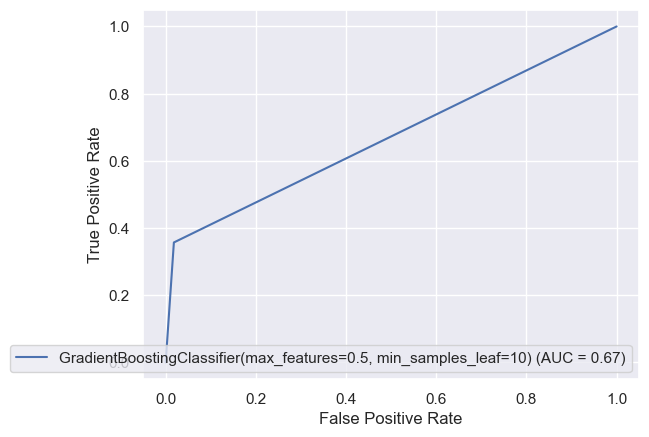

In [94]:
display.plot()

In [95]:
import joblib
joblib.dump(Final_model, "Attrition-prediction")

['Attrition-prediction']

Predicting the saved model

In [97]:
model=joblib.load("Attrition-prediction")

In [98]:
prediction=model.predict(X_test)
prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
436,0,0
437,0,1
438,0,1
439,0,1
